In [1]:
import pandas as pd

filename = 'Start Data/2012/RC_2012-12_gilded.csv'

data = pd.read_csv(filename)

check1 = data['gilded'].apply(lambda x: str(x).isdigit())
check2 = data['score'].apply(lambda x: str(x).isdigit())
check3 = data['ups'].apply(lambda x: str(x).isdigit())

data = data[(check1 == True)]

print 'gilded:', data['gilded'].dtype
print data['gilded'].unique()
print 'score:', data['score'].dtype
print data['score'].unique()
print 'ups:', data['ups'].dtype
print data['ups'].unique()

# data.to_csv(filename, encoding='utf-8', index=False)

gilded: int64
[ 1  2  3  7 11  5  9  4  8]
score: int64
[  24  432  216 ...,  517 1636  879]
ups: int64
[  24  432  216 ...,  517 1636  879]


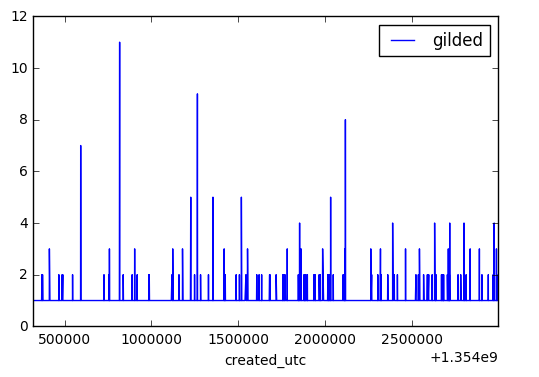

In [2]:
%matplotlib inline

filename = 'Start Data/2012/RC_2012-12_gilded.csv'

data = pd.read_csv(filename)

data.plot(x='created_utc', y='gilded', kind='line')

In [2]:
from scripts import Munger as rh
import pandas as pd
import re

# Testing function for scripts
def containsMD(body):
    heading = r'\W#{1,6}\s'
    emphasis1 = r'\*{1,2}[\s\S]+\*{1,2}'
    emphasis2 = r'_{1,2}[\s\S]+_{1,2}'
    emphasis3 = r'~~[\s\S]+~~'
    superscript = r'\w\^\w'
    unordered = r'\W[\*\-\+]\s\S'
    ordered = r'\W\d\.\s\S'
    url = r'\[[\s\S]+\]\(http[s]?://[\w/\.&=\?;\+\-]+\)'
    code = r'`[\s\S]+`'
    quote = r'(&gt;){1,2}[\s\S]+'

    return (re.search(heading, body) is not None 
       or re.search(emphasis1, body) is not None 
       or re.search(emphasis2, body) is not None
       or re.search(emphasis3, body) is not None
       or re.search(superscript, body) is not None
       or re.search(unordered, body) is not None
       or re.search(ordered, body) is not None
       or re.search(url, body) is not None
       or re.search(code, body) is not None
       or re.search(quote, body) is not None)

# Testing function for scripts
def containsTLDR(body):
    tldr = r'[tT][lL];{0,1}[dD][rR]:{0,1}\s'
    
    return (re.search(tldr, body) is not None)


filename = 'Start Data/2012/RC_2012-01_gilded.csv'

data = pd.read_csv(filename)
test = data[['body']]
test['Contains MD'] = test['body'].apply(lambda x: rh.containsMD(x))
test['Contains tldr'] = test['body'].apply(lambda x: rh.containsTLDR(x))
test
# for text in test[test['Contains tldr'] == True]['body'].values:
#     print '\n----------------------\n', text, '\n----------------------\n'

ImportError: cannot import name Muger

In [4]:
import datetime

def getTimeofDay(data):
    hour = int(datetime.datetime.fromtimestamp(data).strftime("%H"))
    print(hour)
    if hour >= 5 and hour <12:
        print(hour < 12)
        return 'Morning'
    elif hour >= 12 and hour < 17:
        return 'Afternoon'
    elif hour >= 17 and hour < 21:
        return 'Evening'
    elif hour >=21 and hour < 5:
        return 'Night'
    
print(getTimeofDay(1393632172))

18
Evening


In [40]:
from scripts import Munger as mg
import datetime
import pandas as pd

data = pd.read_csv('W:/CSCE489/Start Data/test/RC_2015-01_toplevel_funny.csv')

data['body'] = data['body'].astype(str)

data['gilded'] = data['gilded'].astype(bool)

data['Contains MD'] = data['body'].apply(lambda x: mg.containsMD(x))
data['Contains tldr'] = data['body'].apply(lambda x: mg.containsTLDR(x))
data['Word Count'] = data['body'].apply(lambda x: mg.wordcount(x))
data['Emoji Count'] =data['body'].apply(lambda x: mg.emojicount(x))
data['Time of Day'] =data['created_utc'].apply(lambda x: mg.getTimeofDay(x))

In [41]:
data.head()

,archived,author,author_flair_css_class,author_flair_text,body,controversiality,created_utc,distinguished,downs,edited,...,score,score_hidden,subreddit,subreddit_id,ups,Contains MD,Contains tldr,Word Count,Emoji Count,Time of Day
0,False,deephaven,NaN,NaN,Wheredugit?,0,1420070401,NaN,0,False,...,1,False,funny,t5_2qh33,1,False,False,1,0,Evening
1,False,[deleted],NaN,NaN,[deleted],0,1420070402,NaN,0,False,...,1,False,funny,t5_2qh33,1,False,False,1,0,Evening
2,False,Fusionism,NaN,NaN,I liked the part where the pizzas are wiggling...,0,1420070408,NaN,0,False,...,1,False,funny,t5_2qh33,1,False,False,10,0,Evening
3,False,LOHare,NaN,NaN,"If you're tired enough, any surface is a comfy...",0,1420070413,NaN,0,False,...,1,False,funny,t5_2qh33,1,False,False,10,0,Evening
4,False,[deleted],NaN,NaN,This just made me realize new years for me is ...,0,1420070413,NaN,0,False,...,1,False,funny,t5_2qh33,1,False,False,34,0,Evening


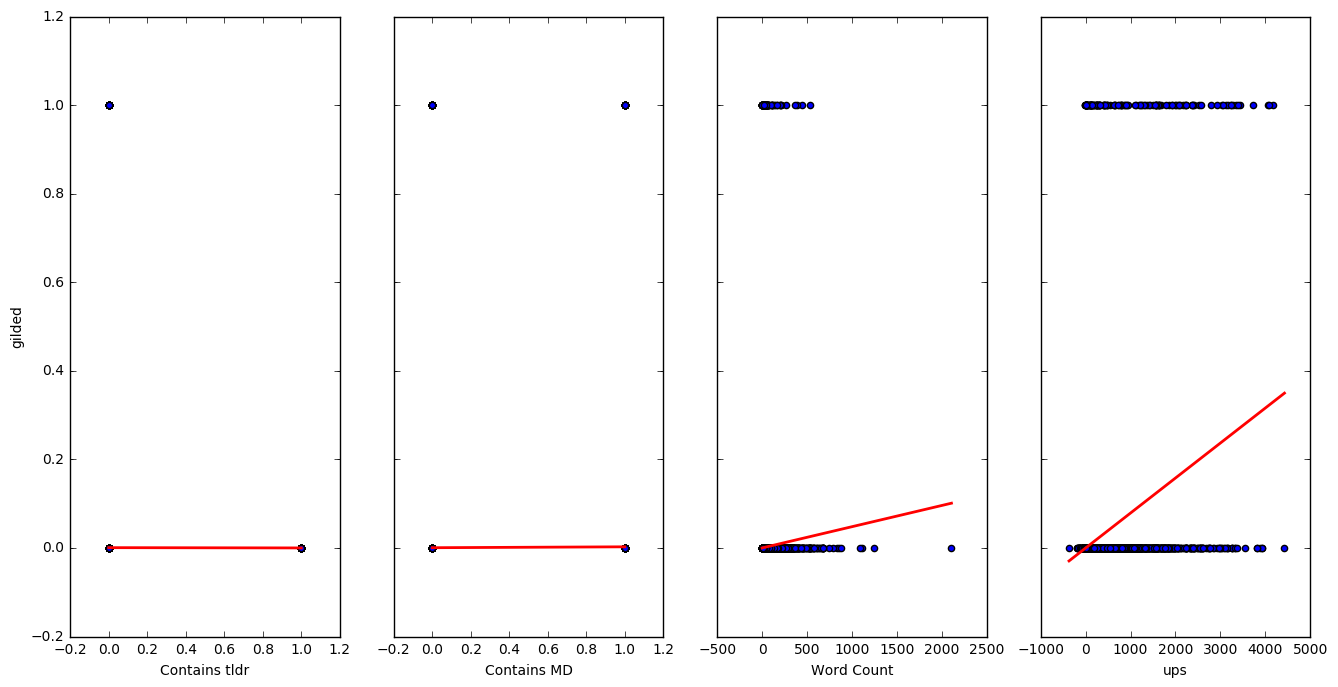

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
lm_in_sklearn = LinearRegression()

data['gilded'] = data['gilded'].astype(bool)

# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 4, sharey=True,  figsize=(16, 8))
data.plot(kind='scatter', x='Contains tldr', y='gilded', ax=axs[0])
X_new = pd.DataFrame({'Contains tldr': [data['Contains tldr'].min(), data['Contains tldr'].max()]})
lm_in_sklearn.fit(data[['Contains tldr']], data['gilded'])
preds = lm_in_sklearn.predict(X_new)
axs[0].plot(X_new, preds, c='red', linewidth=2)

data.plot(kind='scatter', x='Contains MD', y='gilded', ax=axs[1])
X_new = pd.DataFrame({'Contains MD': [data['Contains MD'].min(), data['Contains MD'].max()]})
lm_in_sklearn.fit(data[['Contains MD']], data['gilded'])
preds = lm_in_sklearn.predict(X_new)
axs[1].plot(X_new, preds, c='red', linewidth=2)

data.plot(kind='scatter', x='Word Count', y='gilded', ax=axs[2])
X_new = pd.DataFrame({'Word Count': [data['Word Count'].min(), data['Word Count'].max()]})
lm_in_sklearn.fit(data[['Word Count']], data['gilded'])
preds = lm_in_sklearn.predict(X_new)
axs[2].plot(X_new, preds, c='red', linewidth=2)

data.plot(kind='scatter', x='ups', y='gilded', ax=axs[3])
X_new = pd.DataFrame({'ups': [data['ups'].min(), data['ups'].max()]})
lm_in_sklearn.fit(data[['ups']], data['gilded'])
preds = lm_in_sklearn.predict(X_new)
axs[3].plot(X_new, preds, c='red', linewidth=2)


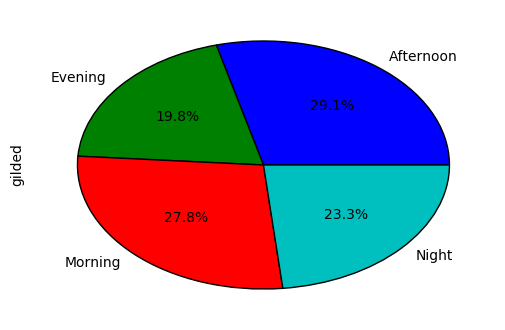

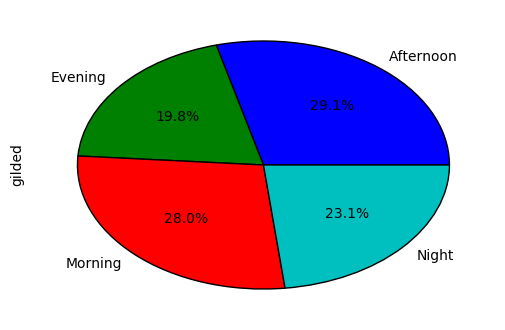

In [10]:
data.groupby('Time of Day')[['gilded']].count().plot(kind='pie',y='gilded', autopct='%1.1f%%', legend=False)

data.groupby('Time of Day')[['gilded']].sum().plot(kind='pie',y='gilded', autopct='%1.1f%%', legend=False)

In [8]:
X = data[['Word Count']]
y = data['gilded']

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm_in_sklearn = LinearRegression()
lm_in_sklearn.fit(X, y)

# print intercept and coefficients
print "Intercept = ", lm_in_sklearn.intercept_
print "Coefficient = ", lm_in_sklearn.coef_

# calculate the R-squared
print 'R-squared = ', lm_in_sklearn.score(X, y)

Intercept =  1.03571120893
Coefficient =  [ 0.00027689]
R-squared =  0.0107459920164


In [ ]:
topsum = data.groupby('subreddit')[['gilded']].count().sort_values('gilded', ascending=False).head(10).sum()
remaindersum = data.groupby('subreddit')[['gilded']].count().sort_values('gilded', ascending=True).head(-10).sum()

top = data.groupby('subreddit')[['gilded']].count().sort_values('gilded', ascending=False).head(10)
top.append(pd.DataFrame([(remaindersum-topsum)], columns=['gilded'], index=['Other'])).plot(kind='pie', y='gilded', autopct='%1.1f%%', legend=False)
top.plot(kind='pie', y='gilded', autopct='%1.1f%%', legend=False)

## Score Features

C:\Users\jsmoo\Anaconda2\envs\cs489\lib\site-packages\ipykernel\__main__.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Feature ranking:
1. Word Count (0.890577)
2. Time of Day (0.078090)
3. Contains MD (0.018330)
4. Contains tldr (0.013003)
5. edited (0.000000)
6. Emoji Count (0.000000)


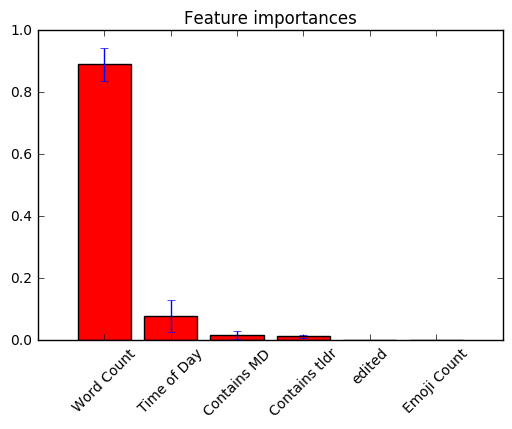

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scripts import Munger as mg

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

data = pd.read_csv('W:/CSCE489/Start Data/Train/WTF_train.csv')

data['body'] = data['body'].astype(str)

# Munge data
data['Contains MD'] = data['body'].map(lambda x: mg.containsMD(x))
data['Contains tldr'] = data['body'].map(lambda x: mg.containsTLDR(x))
data['Word Count'] = data['body'].map(lambda x: mg.wordcount(x))
data['Emoji Count'] = data['body'].map(lambda x: mg.emojicount(x))
data['Time of Day'] = data['created_utc'].map(lambda x: mg.getTimeofDay(x))
data['edited'] = data['edited'].astype(bool)

todmap = {
    'Afternoon': 1,
    'Evening': 2,
    'Night': 3,
    'Morning': 4
}

X = data[['Contains MD', 'Contains tldr', 'Word Count', 'Emoji Count', 'Time of Day', 'edited']]
X['Time of Day'] = X['Time of Day'].map(todmap)
y = data['score']
                            
# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print '%d.' % (f + 1), X.columns.values[indices[f]], '(%f)' % importances[indices[f]]

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), [ X.columns.values[i] for i in indices], rotation=45)
plt.xlim([-1, X.shape[1]])
plt.show()

## Gilded Features

C:\Users\jsmoo\Anaconda2\envs\cs489\lib\site-packages\ipykernel\__main__.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Feature ranking:
1. score (0.723992)
2. Word Count (0.194266)
3. Contains MD (0.042456)
4. Time of Day (0.036623)
5. Contains tldr (0.002663)
6. edited (0.000000)
7. Emoji Count (0.000000)


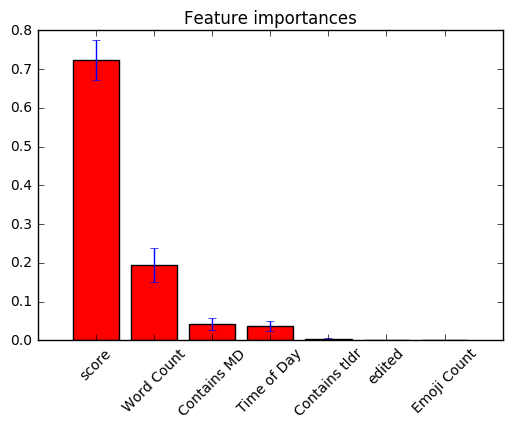

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scripts import Munger as mg

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

data = pd.read_csv('W:/CSCE489/Start Data/Train/WTF_train.csv')

data['body'] = data['body'].astype(str)

# Munge data
data['Contains MD'] = data['body'].map(lambda x: mg.containsMD(x))
data['Contains tldr'] = data['body'].map(lambda x: mg.containsTLDR(x))
data['Word Count'] = data['body'].map(lambda x: mg.wordcount(x))
data['Emoji Count'] = data['body'].map(lambda x: mg.emojicount(x))
data['Time of Day'] = data['created_utc'].map(lambda x: mg.getTimeofDay(x))
data['edited'] = data['edited'].astype(bool)

todmap = {
    'Afternoon': 1,
    'Evening': 2,
    'Night': 3,
    'Morning': 4
}

X = data[['score' ,'Contains MD', 'Contains tldr', 'Word Count', 'Emoji Count', 'Time of Day', 'edited']]
X['Time of Day'] = X['Time of Day'].map(todmap)
y = data['gilded'].astype(bool)
                            
# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print '%d.' % (f + 1), X.columns.values[indices[f]], '(%f)' % importances[indices[f]]

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), [ X.columns.values[i] for i in indices], rotation=45)
plt.xlim([-1, X.shape[1]])
plt.show()

## Clustering

In [24]:
import pandas as pd
from scripts import Munger as mg

#### Feature Importance Function

In [25]:
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np
import matplotlib.pyplot as plt

def feature_importance(train, test, features, predict, df=pd.DataFrame()):
    
    X = train[features]
    y = train[predict]

    # Build a forest and compute the feature importances
    forest = ExtraTreesClassifier(n_estimators=50,
                                  random_state=None)

    forest.fit(X, y)
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]

    # Print the feature ranking
    print("Feature ranking:")

    for f in range(X.shape[1]):
        print '%d.' % (f + 1), X.columns.values[indices[f]], '(%f)' % importances[indices[f]]

    # Plot the feature importances of the forest
    plt.figure()
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), importances[indices],
           color="r", yerr=std[indices], align="center")
    plt.xticks(range(X.shape[1]), [ X.columns.values[i] for i in indices], rotation=45)
    plt.xlim([-1, X.shape[1]])
    plt.show()

    X = test[features]
    y = test[predict]

    print 'Score:', forest.score(X,y)
    
    if not df.empty:
        print 'test:', forest.predict(df[features])

#### TFIDF Vectorizor Function

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

def tfidf_vectorize(train, test, maxdf=0.8, mindf=0.05):
    tfidf = TfidfVectorizer(stop_words='english', max_df=maxdf, min_df=mindf)

    train_tfidf = tfidf.fit_transform(train)
    test_tfidf = tfidf.transform(test)
    
    return {'train_tfidf': train_tfidf,'test_tfidf': test_tfidf}

#### Clustering Function

In [27]:
from sklearn.cluster import KMeans, MiniBatchKMeans

def cluster(train, test, clusters=10, iterations=300, init=10):
    km = KMeans(n_clusters=clusters, init='k-means++', max_iter=iterations, n_init=init)

    train_preds = km.fit_predict(train_tfidf)
    test_preds = km.predict(test_tfidf)
    
    return {'train_preds': train_preds, 'test_preds': test_preds}

#### Saving Classifiers

In [28]:
import pickle

def save_classifiers(tfidf, km, forest):

    with open("tfidf_vectorizer.pickle",'wb') as f:
        pickle.dump(tfidf, f) # saves classifier to file

    with open("kmeans_clustering.pickle",'wb') as f:
        pickle.dump(km, f) # saves classifier to file

    with open("forest_classifier.pickle",'wb') as f:
        pickle.dump(forest, f) # saves classifier to file

### Watson K-means and Sentiment Introduction

In [37]:
train = pd.read_csv('W:/CSCE489/mytrain/addedfunny_train.csv')
test = pd.read_csv('W:/CSCE489/mytest/addedfunny_test.csv')

train = mg.munge_dataset(train)
test = mg.munge_dataset(test)

# train.head()

In [38]:
watson = ['Watson Anger', 'Watson Disgust', 'Watson Fear',
           'Watson Joy', 'Watson Sadness', 'Watson Analytical',
           'Watson Confident', 'Watson Tenative', 'Watson Openness',
           'Watson Conscientiousness', 'Watson Extraversion',
           'Watson Agreeableness', 'Watson Emotional Range'] 

train_tfidf = train[watson].values
test_tfidf = test[watson].values

In [39]:
preds = cluster(train_tfidf, test_tfidf, 200, 300, 10)
train['watson cluster'] = preds['train_preds']
test['watson cluster'] = preds['test_preds']

train['gilded'] = train['gilded'].astype(bool)
test['gilded'] = test['gilded'].astype(bool)

# train.groupby(['cluster', 'gilded'])[['body']].count()

Feature ranking:
1. Score Bracket (0.184929)
2. Contains MD (0.083298)
3. Word Count (0.067713)
4. Watson Agreeableness (0.053500)
5. Watson Emotional Range (0.052415)
6. Watson Anger (0.050639)
7. Watson Extraversion (0.048147)
8. Watson Joy (0.045872)
9. Watson Openness (0.045389)
10. Watson Disgust (0.043139)
11. Grammer Errors (0.041180)
12. Watson Conscientiousness (0.040961)
13. Watson Fear (0.040435)
14. Time of Day (0.040266)
15. Watson Sadness (0.037665)
16. Watson Analytical (0.034985)
17. Watson Tenative (0.034793)
18. Sentiment Label (0.030132)
19. Watson Confident (0.024542)


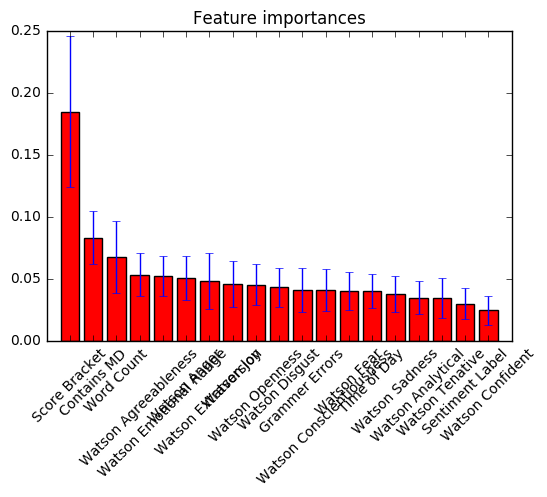

Score: 0.7675


In [41]:
features = [
    'Score Bracket', 
    'Contains MD', 
    'Word Count', 
    'Time of Day', 
#     'watson cluster', 
    'Grammer Errors',
    'Sentiment Label',
#     'Contains Flair',
    'Watson Anger', 'Watson Disgust', 'Watson Fear',
           'Watson Joy', 'Watson Sadness', 'Watson Analytical',
           'Watson Confident', 'Watson Tenative', 'Watson Openness',
           'Watson Conscientiousness', 'Watson Extraversion',
           'Watson Agreeableness', 'Watson Emotional Range'
]

temp = {
    'Score Bracket': [100], 
    'Contains MD': [True], 
    'Word Count': [200], 
    'Time of Day': [1], 
    'watson cluster': [19], 
    'Grammer Errors': [0],
    'Sentiment Label': [0],
    'Contains Flair': [1]
}

    
feature_importance(train, test, features, 'gilded')

### Conclusion

Even after implementing the sentiment analysis by Watson, the score of the comment is still the most important feature in predicting whether or not it will be given gold.  The next step is to try and infer a comments score based on its other features and then use that in determining its gilded status.

## Predicting Score

In [42]:
train = pd.read_csv('W:/CSCE489/mytrain/addedfunny_train.csv')
test = pd.read_csv('W:/CSCE489/mytest/addedfunny_test.csv')

train = mg.munge_dataset(train)
test = mg.munge_dataset(test)

# train.head()

In [43]:
# Cluster based on the comment body

tfidf = tfidf_vectorize(train['body'], test['body'], maxdf=0.8, mindf=0.05)
train_tfidf = tfidf['train_tfidf']
test_tfidf = tfidf['train_tfidf']

preds = cluster(train_tfidf, test_tfidf, 200, 300, 10)
train['body cluster'] = preds['train_preds']
test['body cluster'] = preds['test_preds']

# test['score bracket'] = mg.get_Up_Classification(test['score'])
# train.groupby(['body cluster', 'score bracket'])[['body']].count()

In [44]:
# Cluster based on the watson sentiment analysis

watson = ['Watson Anger', 'Watson Disgust', 'Watson Fear',
           'Watson Joy', 'Watson Sadness', 'Watson Analytical',
           'Watson Confident', 'Watson Tenative', 'Watson Openness',
           'Watson Conscientiousness', 'Watson Extraversion',
           'Watson Agreeableness', 'Watson Emotional Range'] 

train_tfidf = train[watson].values
test_tfidf = test[watson].values

preds = cluster(train_tfidf, test_tfidf, 200, 300, 10)
train['watson cluster'] = preds['train_preds']
test['watson cluster'] = preds['test_preds']

# test['score bracket'] = mg.get_Up_Classification(test['score'])
# train.groupby(['watson cluster', 'score bracket'])[['body']].count()

 Feature ranking:
1. Grammer Errors (0.062569)
2. Watson Emotional Range (0.060993)
3. Watson Extraversion (0.058469)
4. Watson Openness (0.058317)
5. Watson Joy (0.057919)
6. Watson Anger (0.056491)
7. Watson Sadness (0.056233)
8. body cluster (0.053237)
9. Watson Fear (0.052955)
10. Watson Disgust (0.052650)
11. watson cluster (0.052002)
12. Watson Agreeableness (0.051649)
13. Word Count (0.050577)
14. Watson Conscientiousness (0.049851)
15. Watson Analytical (0.046181)
16. Time of Day (0.044675)
17. Sentiment Label (0.038194)
18. Watson Tenative (0.037793)
19. Watson Confident (0.033021)
20. Contains MD (0.026027)
21. Contains tldr (0.000195)
22. Emoji Count (0.000000)


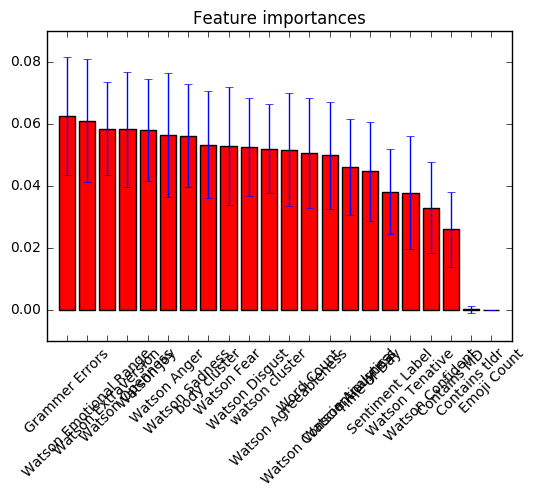

Score: 0.7725


In [46]:
features = [
    'Contains MD', 
    'Word Count', 
    'Time of Day', 
    'body cluster',
    'watson cluster',
    'Grammer Errors', 
    'Emoji Count',
    'Contains tldr',
    'Sentiment Label',
#     'Contains Flair',
    'Watson Anger', 'Watson Disgust', 'Watson Fear',
           'Watson Joy', 'Watson Sadness', 'Watson Analytical',
           'Watson Confident', 'Watson Tenative', 'Watson Openness',
           'Watson Conscientiousness', 'Watson Extraversion',
           'Watson Agreeableness', 'Watson Emotional Range',
]

temp = {
    'Contains MD': [True], 
    'Word Count': [185], 
    'Time of Day': [2], 
    'body cluster': [10],
    'watson cluster': [25],
    'Grammer Errors': [0], 
    'Emoji Count': [2],
    'Contains tldr': [True],
    'Sentiment Label': [1],
    'Contains Flair': [1],
}

feature_importance(train, test, features, 'Score Bracket')